In [1]:
from tensorflow.keras.datasets import mnist 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [2]:
# Split dataset into train and test

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [4]:
# Standardizing x_train, x_test

x_train, x_test = x_train/255.0, x_test/255.0

In [5]:
import tensorflow as tf

In [6]:
# Convert labels to categories

y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
# Defining a model function

def build_model(optimizer):
    model=Sequential([Flatten(input_shape=(28,28)),Dense(64,activation='relu'), Dense(10,activation='softmax')])
    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [8]:
# Building the model by interchanging optimizer
# adam optimizer: 0.001
# SDG optimizer (stochastic Gradient Descent): 0.1 - 0.01

model_sgd = build_model(tf.keras.optimizers.SGD(learning_rate = 0.01))

C:\Users\hibah\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
history_sgd = model_sgd.fit(x_train, y_train_cat, epochs = 7, validation_split = 0.2, verbose = 1)

Epoch 1/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6831 - loss: 1.1996 - val_accuracy: 0.8957 - val_loss: 0.3961
Epoch 2/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8921 - loss: 0.4016 - val_accuracy: 0.9095 - val_loss: 0.3272
Epoch 3/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9056 - loss: 0.3300 - val_accuracy: 0.9170 - val_loss: 0.2925
Epoch 4/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9153 - loss: 0.2991 - val_accuracy: 0.9236 - val_loss: 0.2690
Epoch 5/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9219 - loss: 0.2787 - val_accuracy: 0.9278 - val_loss: 0.2526
Epoch 6/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9273 - loss: 0.2530 - val_accuracy: 0.9317 - val_loss: 0.2380
Epoch 7/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9353 - loss: 0.2358 - val_accuracy: 0.9377 - val_loss: 0.2258


In [10]:
model_adam = build_model(tf.keras.optimizers.Adam(learning_rate = 0.001))

In [11]:
history_adam = model_adam.fit(x_train,y_train_cat,epochs = 7,validation_split = 0.2,verbose = 1)

Epoch 1/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8472 - loss: 0.5515 - val_accuracy: 0.9456 - val_loss: 0.1924
Epoch 2/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9499 - loss: 0.1736 - val_accuracy: 0.9564 - val_loss: 0.1466
Epoch 3/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9670 - loss: 0.1184 - val_accuracy: 0.9656 - val_loss: 0.1237
Epoch 4/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9742 - loss: 0.0890 - val_accuracy: 0.9647 - val_loss: 0.1164
Epoch 5/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9775 - loss: 0.0757 - val_accuracy: 0.9685 - val_loss: 0.1086
Epoch 6/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9815 - loss: 0.0631 - val_accuracy: 0.9688 - val_loss: 0.1024
Epoch 7/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9853 - loss: 0.0512 - val_accuracy: 0.9709 - val_loss: 0.1021


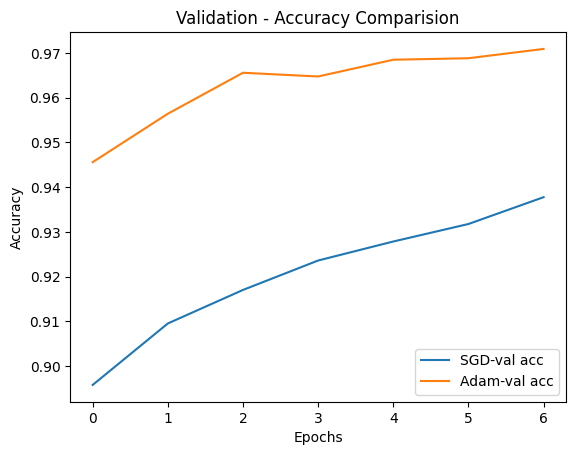

In [26]:
# Compare performance

plt.plot(history_sgd.history['val_accuracy'], label='SGD-val acc')
plt.plot(history_adam.history['val_accuracy'], label='Adam-val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Validation - Accuracy Comparision")
plt.show()

In [28]:
# verify overfitting or underfitting in the model

model=Sequential([Flatten(input_shape=(28,28)),Dense(256,activation='relu'),Dense(256,activation='relu'),Dense(10,activation='softmax')])

In [30]:
# load the data
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

In [33]:
# preprocess the data
y_train_cat=tf.keras.utils.to_categorical(y_train)
y_test_cat=tf.keras.utils.to_categorical(y_test)

In [35]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
history=model.fit(x_train,y_train_cat,epochs=15,batch_size=64,validation_split=0.2)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8717 - loss: 0.4452 - val_accuracy: 0.9643 - val_loss: 0.1181
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9696 - loss: 0.1017 - val_accuracy: 0.9665 - val_loss: 0.1033
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9792 - loss: 0.0645 - val_accuracy: 0.9737 - val_loss: 0.0918
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9869 - loss: 0.0420 - val_accuracy: 0.9706 - val_loss: 0.0965
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9895 - loss: 0.0319 - val_accuracy: 0.9739 - val_loss: 0.0964
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9916 - loss: 0.0258 - val_accuracy: 0.9749 - val_loss: 0.0921
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9935 - loss: 0.0189 - val_accuracy: 0.9732 - val_loss: 0.1098
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9924 - loss: 0.0220 - 

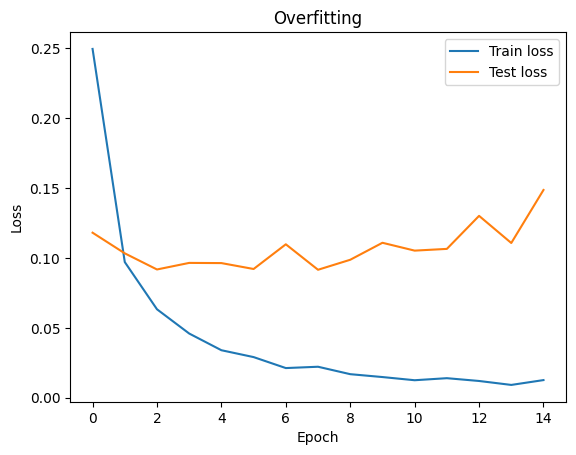

In [ ]:
# Draw a line plot

plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.title('Overfitting')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
# Prevent overfitting using l2 regularisation

from tensorflow.keras.regularizers import l2              # importing l2 regularisation

In [43]:
model = Sequential([Flatten(input_shape = (28,28)),Dense(256,activation = 'relu',kernel_regularizer = l2(0.001)),Dense(10,activation = 'softmax')])

In [45]:
# Hyperparameter Tuning with learning rate,batch size,epochs
model = Sequential([Flatten(input_shape = (28,28)),Dense(128,activation = 'relu'),Dense(10,activation = 'softmax')])
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [47]:
# train the model
history=model.fit(x_train,y_train_cat,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8468 - loss: 0.5612 - val_accuracy: 0.9488 - val_loss: 0.1807
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9534 - loss: 0.1612 - val_accuracy: 0.9600 - val_loss: 0.1347
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9676 - loss: 0.1094 - val_accuracy: 0.9663 - val_loss: 0.1159
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9763 - loss: 0.0813 - val_accuracy: 0.9699 - val_loss: 0.1018
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9830 - loss: 0.0630 - val_accuracy: 0.9718 - val_loss: 0.0975
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9853 - loss: 0.0515 - val_accuracy: 0.9732 - val_loss: 0.0875
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9877 - loss: 0.0413 - val_accuracy: 0.9726 - val_loss: 0.0894
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9916 - loss: 0.0321 - val_accu

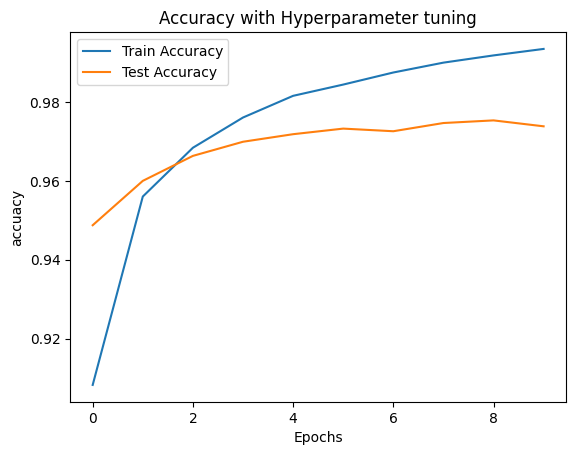

In [51]:
# draw a line-plot
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Test Accuracy')
plt.title('Accuracy with Hyperparameter tuning')
plt.xlabel('Epochs')
plt.ylabel('accuacy')
plt.legend()
plt.show()